# Part I - (Sales Data Exploration)
## by Oluwafemi Oyebamiji

## Introduction
> Sample Sales Data was inspired for retail analytics and was originally used for Pentaho DI Kettle. This is downloaded from the Kaggle url:
> https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

##TABLE OF CONTENT

 * Preliminary Wrangling
 * [Univariate](#univariate)
 * [Bivariate](#bivariate)
 * [Multivariate](#multivariate)
 * [Conclusion](#conclusion)
 

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#To display all columns and rows in the dataframe when dd.head is executed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('kaggle_sales_data.csv', encoding = "ISO-8859-1")

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05/07/2003 00:00,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07/01/2003 00:00,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 00:00,Shipped,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,USA,Brown,Julie,Medium


In [6]:
df.CITY.value_counts()

Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
San Francisco      62
New Bedford        61
Nantes             60
Melbourne          55
Manchester         51
Bergamo            48
Brickhaven         47
Chatswood          46
North Sydney       46
Philadelphia       44
Boston             44
Reims              41
Lyon               41
San Jose           40
Salzburg           40
Reggio Emilia      39
Boras              38
Cambridge          38
London             38
Kobenhavn          36
Nashua             34
Burlingame         34
Oulu               32
Minato-ku          32
Stavern            32
Gensve             31
Allentown          31
Espoo              30
Pasadena           30
Helsinki           30
Bergen             29
Liverpool          29
Las Vegas          29
Aaarhus            27
Makati City        26
Cowes              26
Torino             26
Tsawassen          26
White Plains       26
Koln               26
Bruxelles 

In [7]:
#check the shape of the datasets - samples and features
df.shape

(2823, 19)

In [8]:
# check for data types
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
COUNTRY              object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [9]:
#convert all columns to the right datatypes
right_dtypes = {
                'ORDERNUMBER' : object,
                'QUANTITYORDERED' : int,
                'PRICEEACH' : float,
                'ORDERLINENUMBER' : object,
                'SALES' : float,
                'ORDERDATE' : 'datetime64[ns]',
                'STATUS': 'category',
                'PRODUCTLINE': 'category',
                'MSRP' : int,
                'PRODUCTCODE': object,
                'CUSTOMERNAME' : object,
                'PHONE' : object,
                'ADDRESSLINE1' : object,
                'ADDRESSLINE2' : object,
                'CITY' : object,
                'COUNTRY': 'category',
                'CONTACTLASTNAME': object,
                'CONTACTFIRSTNAME': object,
                'DEALSIZE' : 'category'
                }
df = df.astype(right_dtypes)

In [10]:
# Verify dtypes
df.dtypes

ORDERNUMBER                 object
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER             object
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                    category
PRODUCTLINE               category
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
COUNTRY                   category
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                  category
dtype: object

In [11]:
#check for missing values

In [12]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
COUNTRY                0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
# Only the address line 2 has missing values and we can ignore this for now

In [14]:
#check for duplicates
df.duplicated().sum()

0

### What is the structure of your dataset?

> There are 2,823 samples and 19 features in the dataset. Only the address line 2 has missing values and we can ignore this for now since it is very common that customers only have address one or ignored supplying an alternative address.

> This datasets contains 4 numerical columns while other columns are categorical/object columns. The columns available with their data types after preliminary wrangling are:

        ORDERNUMBER                 object
        QUANTITYORDERED              int64
        PRICEEACH                  float64
        ORDERLINENUMBER             object
        SALES                      float64
        ORDERDATE           datetime64[ns]
        STATUS                    category
        PRODUCTLINE               category
        MSRP                         int64
        PRODUCTCODE                 object
        CUSTOMERNAME                object
        PHONE                       object
        ADDRESSLINE1                object
        ADDRESSLINE2                object
        CITY                        object
        COUNTRY                   category
        CONTACTLASTNAME             object
        CONTACTFIRSTNAME            object
        DEALSIZE                  category

### What is/are the main feature(s) of interest in your dataset?

> Did we do better in some years or some product line or some country in terms of sales revenue?

> What are the factors driving trends in our sales?

> If our goal is to increase our sales revenue, what are the variables we can look out for?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The sales value for goods sold together with other sales information like order status, country of sales, dealsize, etc would be a great place to start exploration.

<div id ='univariate'></div>

## Univariate Exploration


#### COUNT OF ORDER BY STATUS
> What is the count of all sales by order status? So we can see the possibility of focusing on only orders that matter.

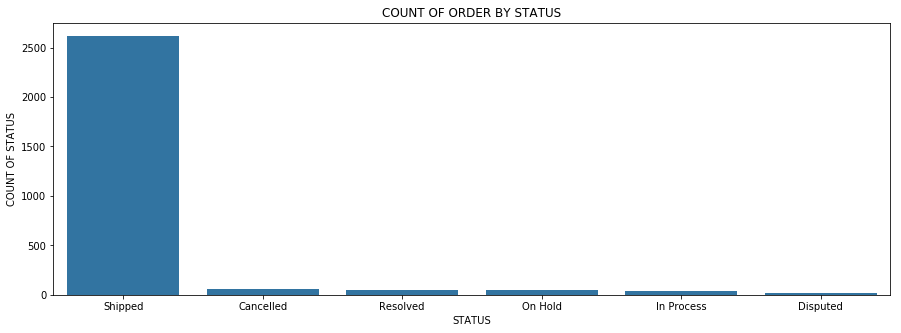

In [15]:
myorder = df['STATUS'].value_counts().index
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'STATUS', order=myorder, color= sns.color_palette()[0]);
plt.ylabel('COUNT OF STATUS')
plt.xlabel('STATUS')
plt.title('COUNT OF ORDER BY STATUS');

> It is obvious the shipped status forms the majority of all sales record. Let's check for the actual percentage

In [16]:
df[df['STATUS'] == 'Shipped']['STATUS'].count()/df.shape[0] * 100

92.702798441374426

> 92.70% of our sales are in shipped status. As we proceed, we will attempt to get our actual sales value in terms of revenue by status

#### COUNT OF ORDER BY COUNTRY
> Which country did we have the highest count of sales, not quantity or sales value yet? This can be a good starting point to know if we can focus more energy in this countries subsequently to drive revenue

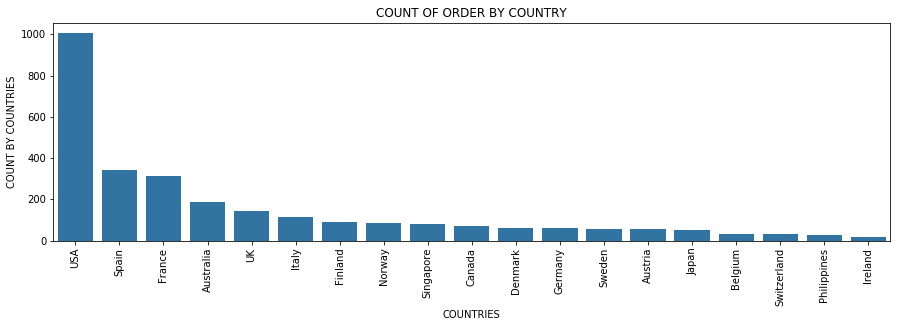

In [17]:
myorder = df['COUNTRY'].value_counts().index
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'COUNTRY', order=myorder, color= sns.color_palette()[0])
plt.ylabel('COUNT BY COUNTRIES')
plt.xlabel('COUNTRIES')
plt.title('COUNT OF ORDER BY COUNTRY');

> The above chart shows the top 5 countries by order count is USA, Spain, France, Australia and UK. We may need to also check the actual values of the sales value in terms of revenue for possibility of bulk orders or high valued product being sold in some countries.

#### COUNT OF ORDER BY PRODUCT LINE
> Since we operate multiple product line, do we have count of orders significantly higher for some productline than the orders?

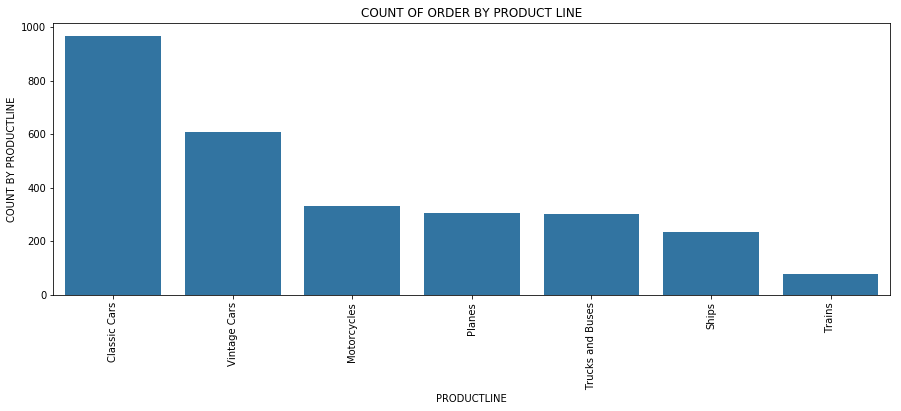

In [18]:
myorder = df['PRODUCTLINE'].value_counts().index
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'PRODUCTLINE', order=myorder, color= sns.color_palette()[0])
plt.ylabel('COUNT BY PRODUCTLINE')
plt.xlabel('PRODUCTLINE')
plt.title('COUNT OF ORDER BY PRODUCT LINE');

> In terms of count of orders classic cars, Vintage Cars and Motorcycles seems to be our hottest products. We will also need to further explore this by actually checking out the revenue from each product line.

#### COUNT OF ORDER BY DEAL SIZE
> Are there any interesting insights that can be generated by looking at the DEAL SIZE? Maybe, a possible deal size accounts for more of our sales and can be given more attention.

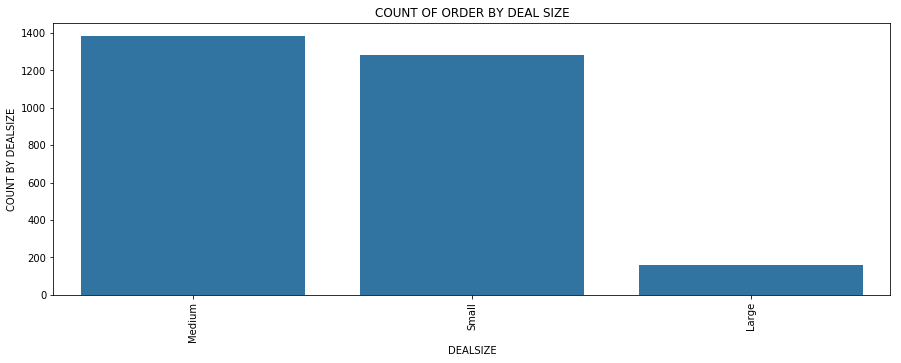

In [19]:
myorder = df['DEALSIZE'].value_counts().index
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'DEALSIZE', order=myorder, color= sns.color_palette()[0])
plt.ylabel('COUNT BY DEALSIZE')
plt.xlabel('DEALSIZE')
plt.title('COUNT OF ORDER BY DEAL SIZE');

> Our Medium deal size is the best sold deal in terms of count of orders, even though it doesn't have much significant difference compared to the small deal size. We will explore this further too to see how revenue performance matches up to this deal sizes

#### DISTRIBUTION OF SALES
> What is the distribution of our actual sales value in the dataset?

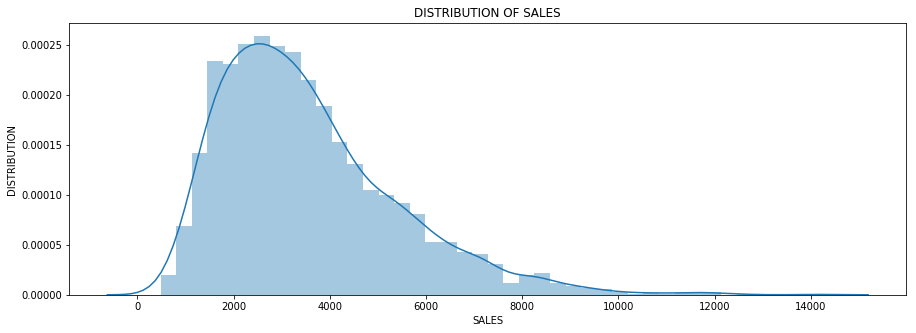

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['SALES'])
plt.ylabel('DISTRIBUTION')
plt.xlabel('SALES')
plt.title('DISTRIBUTION OF SALES');

> The distribution for the sales figures appears skewed to the right. We can say the mean is greater than the median

#### DISTRIBUTION OF QUANTITY ORDERED
> What is the distribution of our quantity ordered in the dataset?

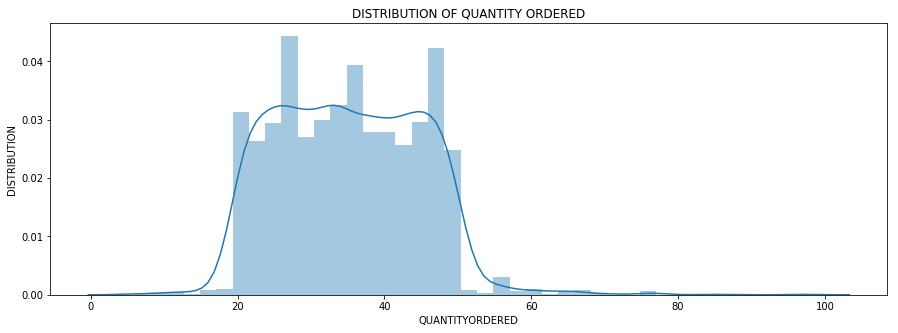

In [21]:
plt.figure(figsize=(15,5))
sns.distplot(df['QUANTITYORDERED'])
plt.ylabel('DISTRIBUTION')
plt.xlabel('QUANTITYORDERED')
plt.title('DISTRIBUTION OF QUANTITY ORDERED');

In [22]:
#check if mean is equals to media rounded off to the nearest whole number
df['QUANTITYORDERED'].mean().round(0) == df['QUANTITYORDERED'].median().round(0)

True

> The distribution is symmetric and we can say the mean is equals to the median. We also did a check mathematically to confirm this.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution for Sales which is a one of the major numeric variable of interest appears right skewed. We can say the mean is greater than the median.

> The distribution is symmetric for the quantity ordered variable and we can say the mean is equals to the median. We also did a check mathematically to confirm this.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We have discovered the following in the univariate section but we will explore this further with bivariate charts:

    - 92.70% of our sales are in shipped status. As we proceed, we will attempt to get our actual sales value in terms of revenue by status
    - The chart shows the top 5 countries by order count are USA, Spain, France, Australia and UK. We may need to also check the actual values of the sales value in terms of revenue for possibility of bulk orders or high valued product being sold in some countries.
    - In terms of count of orders classic cars, Vintage Cars and Motorcycles seems to be our hottest products. We will also need to further explore this by actually checking out the revenue from each product line.
    - Our Medium deal size is the best sold deal in terms of count of orders, even though it doesn't have much significant difference compared to the small deal size. We will explore this further too to see how revenue performance matches up to this deal sizes

<div id ='bivariate'></div>

## Bivariate Exploration

> In this section, we will continue our earlier investigation, especially attempting to check which categories of our products are bringing our top revenue and checking for other factors.

#### SALES BY YEAR
 > Did we do better in some years than the others?

In [23]:
# extract year and month from the date column
df['year'] = df['ORDERDATE'].dt.year.astype('category')
df['month'] = df['ORDERDATE'].dt.month.astype('category')

#map month number to actual month name
df['month'] = df['month'].map({1:'Jan', 2: 'Feb', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7:'July', 8: 'August', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

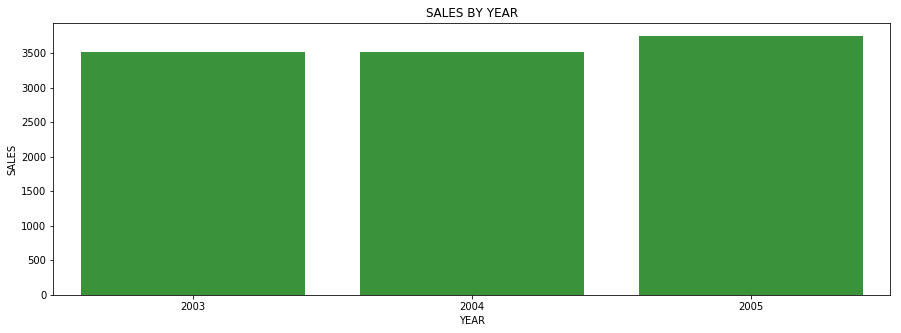

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'year', y='SALES', color= sns.color_palette()[2], ci=None)
plt.ylabel('SALES')
plt.xlabel('YEAR')
plt.title('SALES BY YEAR');

> 2005 seems to be the highest in terms of revenue from sales. It may also interest us to further drill this down by months for each year. Or better put, we could check month on month for the years to identify maybe our peak periods or other interesting insights from the trend of our sales. Since this invoves three variables, we will explore this under our multivariate charts

#### RELATIONSHIP BETWEEN SALES AND QUANTITY ORDERED

> Is there any correlation between sales amount and quantity ordered?

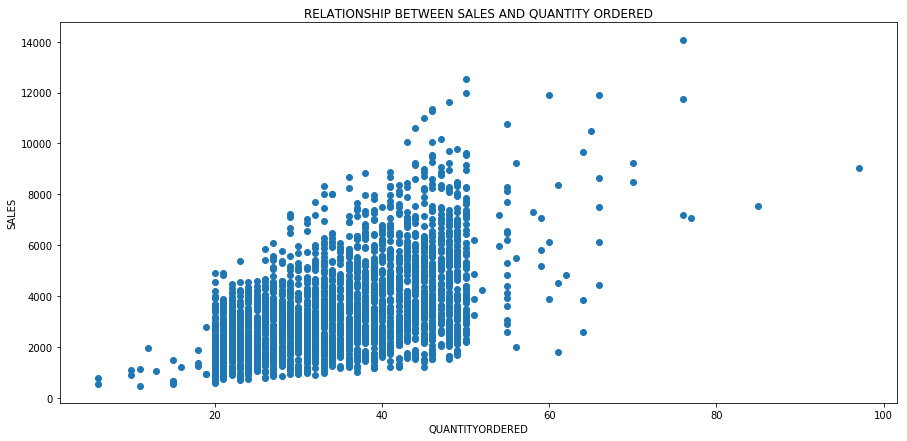

In [25]:
plt.figure(figsize=(15,7))
plt.scatter(data=df, x='QUANTITYORDERED', y='SALES')
plt.ylabel('SALES')
plt.xlabel('QUANTITYORDERED')
plt.title('RELATIONSHIP BETWEEN SALES AND QUANTITY ORDERED');

In [26]:
df['SALES'].corr(df['QUANTITYORDERED'])

0.55142619191835685

> To summarise scatterplot, the closer the data points come to forming a straight line,  the stronger the relationship or the higher the correlation between the two variables. 

> Quantity ordered vs sales seems to have a strong positive correlation. We also confirmed using .corr() function

#### SALES BY STATUS

> Earlier, we discovered 92.70% of our sales in terms of count are in shipped status. 
Now, let's check the actual revenue value by status

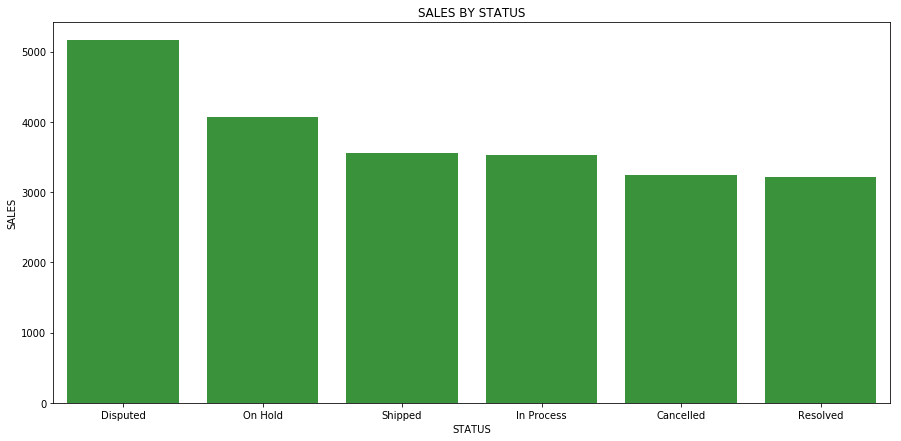

In [27]:
myorder= df.groupby(["STATUS"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,7))
sns.barplot(data = df, x = 'STATUS', y='SALES', color= sns.color_palette()[2], ci=None, order=myorder)
plt.ylabel('SALES')
plt.xlabel('STATUS')
plt.title('SALES BY STATUS');

> It is obvious Disputed makes the highest of our sales revenue followed by On Hold and then shipped. What could have informed this type of behaviour knowing most of our orders actually arrived at shipped status as discovered earlier. Maybe we need to dig further to seeing this Sales by order status further hued with dealsize -  we will look at this under multivariate charts

#### SALES BY PRODUCT LINE

> Earlier, our countplot showed classic cars, Vintage Cars and Motorcycles seems to be our hottest products. 

> Let's further explore this - Are these product lines actually the best sales?

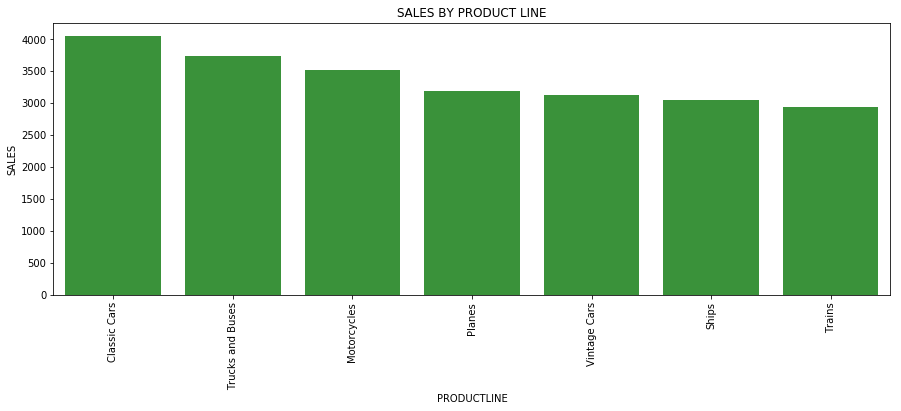

In [28]:
myorder= df.groupby(["PRODUCTLINE"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data = df, x = 'PRODUCTLINE', y='SALES', color= sns.color_palette()[2], ci=None, order=myorder)
plt.ylabel('SALES')
plt.xlabel('PRODUCTLINE')
plt.title('SALES BY PRODUCT LINE');

> Based on the chart above, we can conclude our top 3 product line by sales revenue are Classic Cars, Trucks & Buses and Motorcycles. 

> Classic cars retain its title of being the best sold, same with Motorcycles being third. However, Trucks and Buses is the second best sold product line in terms of revenue/sales value.

#### SALES BY DEAL SIZE

> Earlier with our countplot, our Medium deal size is the best sold deal in terms of count of orders, even though it doesn't have much significant difference compared to the small deal size. 

> Now, lets explore more. Is the Medium deal size the best sold in terms of Sales Value?

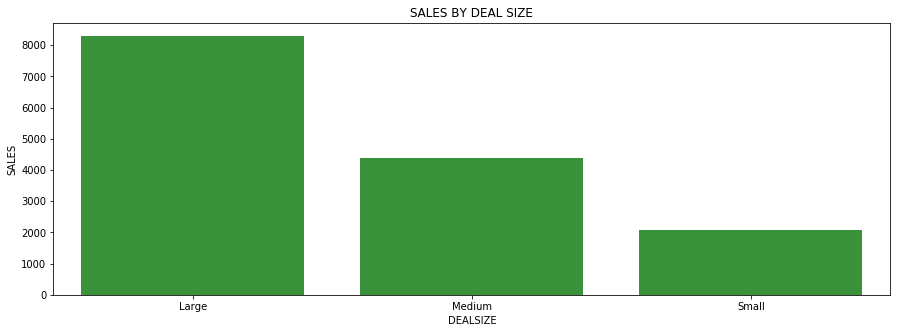

In [29]:
myorder= df.groupby(["DEALSIZE"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'DEALSIZE', y='SALES', color= sns.color_palette()[2], ci=None, order=myorder)
plt.ylabel('SALES')
plt.xlabel('DEALSIZE')
plt.title('SALES BY DEAL SIZE');

In [30]:
#Let's check if the price of the Large deal size is higher than the others
df.groupby('DEALSIZE').mean()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
DEALSIZE,,,,
Large,47.222930,99.799554,8293.753248,158.184713
Medium,37.947254,95.361741,4398.433699,115.848988
Small,30.525741,69.047496,2061.682800,77.340094


> In terms of sales value, our Large deal size has the highest sales value, followed by medium and then the small deal size. The Large deal size most likely overtake the medium deal size in terms of sales value because of the price of each and quantity ordered

#### SALES BY COUNTRY

> Our earlier countplot showed the top 5 countries are USA, Spain, France, Australia and UK.

> Are these countries actually the top countries for our sales?

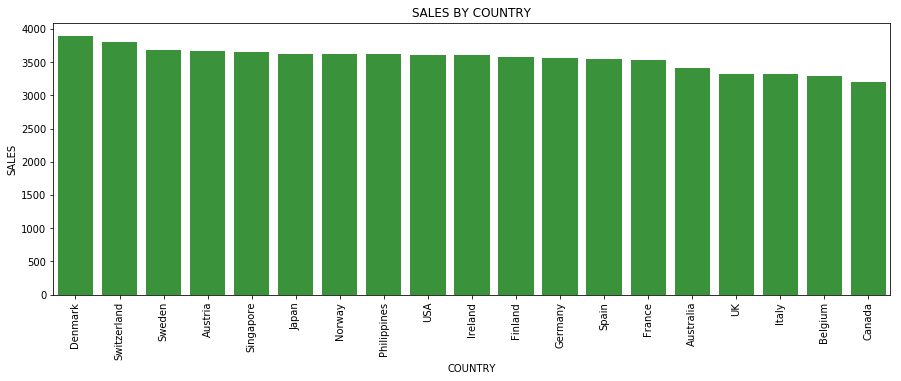

In [31]:
myorder= df.groupby(["COUNTRY"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data = df, x = 'COUNTRY', y='SALES', color= sns.color_palette()[2], ci=None, order=myorder)
plt.ylabel('SALES')
plt.xlabel('COUNTRY')
plt.title('SALES BY COUNTRY');

> Our top countries from the chart above are Denmark, Switzerland, Sweden, Austria and Singapore respectively. None of the countries where we had the highest number of sales made it to the list.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Our sales trend is very dynamic. We have discovered countries where we had the highest number of sales did not translate to the highest number of revenue for the company. Our Large deal size has also being the highest revenue stream while the medium size only enjoyed the highest number of patronage.

> We also discovered that 2005 has the highest sales value and there is a positive correlation between quantity ordered and actual sales value.

> Disputed makes the highest of our sales revenue followed by On Hold and then shipped. What could have informed this type of behaviour knowing most of our orders actually arrived at shipped status as discovered earlier. 

> There is a strong need to dig deeper for most of these observations such as seeing Sales by order status further hued with dealsize - we will look at this under multivariate charts.

<div id ='multivariate'></div>

## Multivariate Exploration

> As concluded earlier, we will focus on digging deeper into our observations from the univariate and bivariate section.

#### MONTH ON MONTH COMPARISON OF SALES FOR THE 3 YEARS

> Earlier we discovered 2005 seems to be the highest in terms of revenue from sales. It may also interest us to further drill this down by months for each year. Or better put, we could check month on month for the years to identify maybe our peak periods or other interesting insights from the trend of our sales.

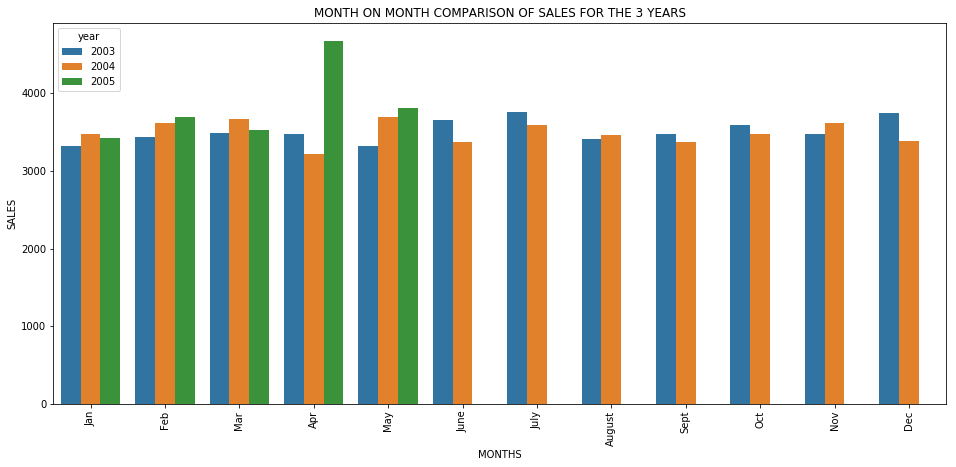

In [32]:
myorder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(16,7))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'month', y='SALES', order = myorder, hue = 'year', ci=None)
plt.ylabel('SALES')
plt.xlabel('MONTHS')
plt.title('MONTH ON MONTH COMPARISON OF SALES FOR THE 3 YEARS');

> From the above chart, 2005 Sales data is as at May 2005. It is interesting to discover only the first 5months of 2005 actually produced the highest revenue for the 3years. It seems we are doing something better and the year looks very bright for us

In [33]:
# sns.pairplot(df);

#### SALES BY ORDER STATUS BY DEALSIZE

> We discovered earlier that Disputed makes the highest of our sales revenue followed by On Hold and then shipped. What could have informed this type of behaviour knowing most of our orders actually arrived at shipped status as discovered from the countplot. 

> There is a strong need to dig deeper for most of these observations such as seeing Sales by order status further hued with dealsize

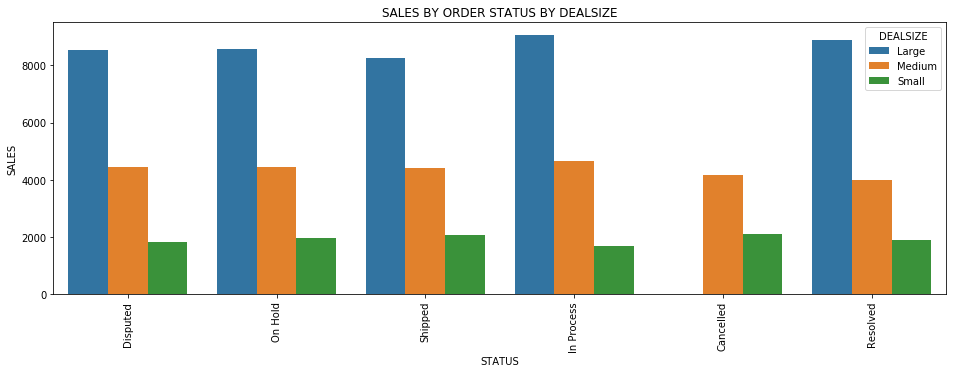

In [34]:
myorder= df.groupby(["STATUS"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,5))
sns.barplot(data = df, x = 'STATUS', y='SALES', hue = 'DEALSIZE', ci=None, order=myorder)
plt.xticks(rotation = 90)
plt.ylabel('SALES')
plt.xlabel('STATUS')
plt.title('SALES BY ORDER STATUS BY DEALSIZE');

> There is not much in the distribution of deal size with respect to the shipped and disputed orders. We may need to dig further by quantityordered

#### SALES BY STATUS BY QUANTITY ORDERED
Let's check if Order Quantity could be the reason why Disputed Status sales value was highest compared to Shipped being the highest in terms of count

Let's form a categorical column from the quantity ordered numerical column using pd.cut and the quantile

In [35]:
df['QUANTITYORDERED'].describe()

count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

In [36]:
df['qty_range'] = pd.cut(df['QUANTITYORDERED'], [6,27,35,43,97], labels = ['Very Large Qty', 'Large Qty', 'Medium Qty','Low Qty'])

In [37]:
df.sample(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,year,month,qty_range
979,10312,38,100.0,5,4457.02,2004-10-21,Shipped,Vintage Cars,104,S18_3136,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,NaN,San Rafael,USA,Nelson,Valarie,Medium,2004,Oct,Medium Qty
1007,10336,48,100.0,12,5778.24,2004-11-20,Shipped,Vintage Cars,136,S18_3140,"La Corne D'abondance, Co.",(1) 42.34.2555,"265, boulevard Charonne",NaN,Paris,France,Bertrand,Marie,Medium,2004,Nov,Low Qty


Text(0.5,1,'SALES BY STATUS BY QUANTITY ORDERED')

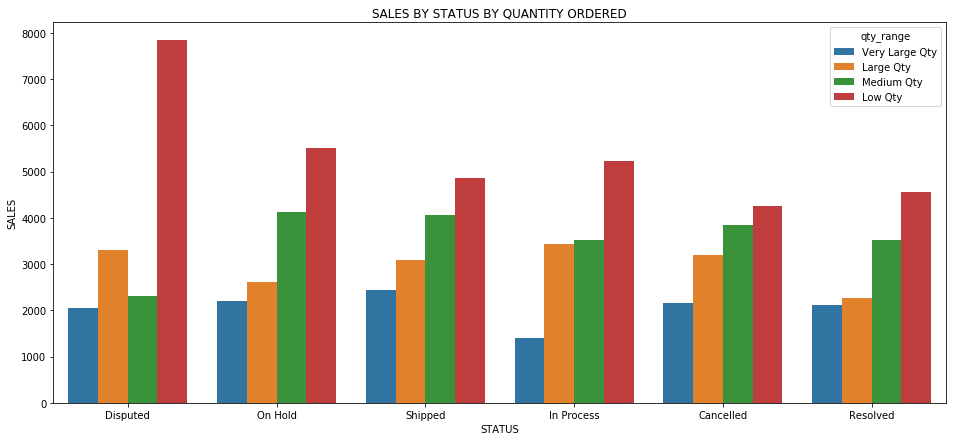

In [38]:
myorder= df.groupby(["STATUS"])["SALES"].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,7))
sns.barplot(data = df, x = 'STATUS', y='SALES', hue = 'qty_range', ci=None, order=myorder)
plt.ylabel('SALES')
plt.xlabel('STATUS')
plt.title('SALES BY STATUS BY QUANTITY ORDERED')

In [39]:
df.groupby(["STATUS"])["SALES"].mean().sort_values(ascending=False)

STATUS
Disputed      5158.061429
On Hold       4067.708864
Shipped       3550.439847
In Process    3529.999024
Cancelled     3241.458000
Resolved      3206.771915
Name: SALES, dtype: float64

> There seems to be more to the disputed overshadowing the shipped status despite the shipped status having a very high count of sales. We hope to investigate this more in the future

#### CORRELATION HEATMAP

> What are the variables that drive sales value? 

> We will use correlation to check this. Correlation closer to 1 means positive correlation, close to -1 means negative correlation and zero means no correlation while values close to zero means weak correlation

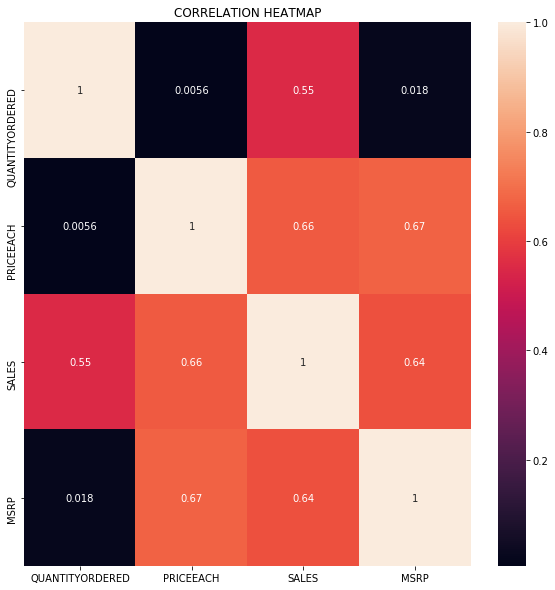

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.title('CORRELATION HEATMAP');

> It can be concluded from above that quantity ordered, price of each product and MSRP are strongly positively correlated to sales value. An increase in any of this value can give us an increase in the sales value

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our sales trend is very dynamic. We have discovered countries where we had the highest number of sales did not translate to the highest number of revenue for the company. Our Large deal size has also being the highest revenue stream while the medium size only enjoyed the highest number of patronage.

> We also discovered that 2005 has the highest sales value and there is a positive correlation between quantity ordered and actual sales value.

> Disputed makes the highest of our sales revenue followed by On Hold and then shipped.

### Were there any interesting or surprising interactions between features?

> It can be concluded that quantity ordered, price of each product and MSRP are strongly positively correlated to sales value. An increase in any of this value can give us an increase in the sales value

<div id ='conclusion'></div>

## Conclusions
> In Summary:

> 92.70% of our sales are in shipped status. As we proceed, we will attempt to get our actual sales value in terms of revenue by status
> The chart shows the top 5 countries by order count are USA, Spain, France, Australia and UK. We may need to also check the actual values of the sales value in terms of revenue for possibility of bulk orders or high valued product being sold in some countries.
> In terms of count of orders classic cars, Vintage Cars and Motorcycles seems to be our hottest products. We also further explore this by actually checking out the revenue from each product line.
> Our Medium deal size is the best sold deal in terms of count of orders, even though it doesn't have much significant difference compared to the small deal size. We also explore this further too to see how revenue performance matches up to this deal sizes.

> Our sales trend is very dynamic. We have discovered countries where we had the highest number of sales did not translate to the highest number of revenue for the company. Our Large deal size has also being the highest revenue stream while the medium size only enjoyed the highest number of patronage.

> We also discovered that 2005 has the highest sales value and there is a positive correlation between quantity ordered and actual sales value.

> Disputed makes the highest of our sales revenue followed by On Hold and then shipped.


> It can be concluded that quantity ordered, price of each product and MSRP are strongly positively correlated to sales value. An increase in any of this value can give us an increase in the sales value


In [41]:
df.to_csv('cleaned_sales.csv', index=False)